In [ ]:
#step 2 
#/nfs/lab/projects/nPOD/cellranger_output/Multiome/MM_660/outs

In [15]:
import os
os.getcwd()

'/tscc/nfs/home/abhowell/scenic_scripts'

In [1]:
import scanpy as sc

In [2]:
adata = sc.read_10x_mtx(
    "/tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/filtered_feature_bc_matrix",
    var_names = "gene_symbols"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 2064 × 36601
    var: 'gene_ids', 'feature_types'

In [4]:
adata.var_names_make_unique()


In [5]:
adata

AnnData object with n_obs × n_vars = 2064 × 36601
    var: 'gene_ids', 'feature_types'

In [6]:
import pandas as pd
cell_data = pd.read_table("/tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/npod1_metadata.tsv", index_col = 0)
cell_data.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.1,seurat_clusters,samples,sex,condition,RNA_snn_res.0.5,celltype_assignment1,SeuratClusters,celltype_assignment2,barcode,nPOD_barcode,CurrentObjLabels,nPOD_ID,technology,nCount_RAW_mtx,nFeature_RAW_mtx
AAACGTACATGTTTGG-1,SeuratProject,2587,1286,0.000000,4,3,MM_660,F,Control,3,Acinar,3,Acinar,AAACGTACATGTTTGG-1,MM_660_AAACGTACATGTTTGG,Acinar_3,multi_6375,multiome,2946,1465
AAAGCCGCAATATGGA-1,SeuratProject,1438,1072,0.278164,1,6,MM_660,F,Control,6,Acinar,6,Acinar,AAAGCCGCAATATGGA-1,MM_660_AAAGCCGCAATATGGA,Acinar_4,multi_6375,multiome,1647,1201
AAAGGAGCAGTCTAGC-1,SeuratProject,6446,2550,0.000000,3,2,MM_660,F,Control,2,Acinar,2,Acinar,AAAGGAGCAGTCTAGC-1,MM_660_AAAGGAGCAGTCTAGC,Acinar1_2_6,multi_6375,multiome,7583,2986
AACCGGCTCATGGTGT-1,SeuratProject,1418,833,0.493653,6,4,MM_660,F,Control,4,Ductal,4_10,Ductal,AACCGGCTCATGGTGT-1,MM_660_AACCGGCTCATGGTGT,Ductal,multi_6375,multiome,1562,924
AACCGGCTCCAACTGG-1,SeuratProject,3524,1785,0.000000,6,4,MM_660,F,Control,4,Ductal,4_7,Ductal,AACCGGCTCCAACTGG-1,MM_660_AACCGGCTCCAACTGG,Ductal,multi_6375,multiome,4079,2085


In [7]:
cell_data.index

Index(['AAACGTACATGTTTGG-1', 'AAAGCCGCAATATGGA-1', 'AAAGGAGCAGTCTAGC-1',
       'AACCGGCTCATGGTGT-1', 'AACCGGCTCCAACTGG-1', 'AACCTCACAAATGCCC-1',
       'AACCTCCTCCGCAAGC-1', 'AACCTTAAGCGATAGA-1', 'AACCTTAAGGAGTCTT-1',
       'AACGCCCAGGCCGGAA-1',
       ...
       'TTTAGGATCGTAATCA-1', 'TTTCTTGCAGGGAGGA-1', 'TTTGCATTCAAGCTTA-1',
       'TTTGGCTGTCAAGTGC-1', 'TTTGGCTGTCCGTAGG-1', 'TTTGGCTGTGCATTTC-1',
       'TTTGGCTGTTCGCTTG-1', 'TTTGTCTAGCTCCTAC-1', 'TTTGTCTAGGTAGCTT-1',
       'TTTGTGGCAAGTCGCT-1'],
      dtype='object', length=573)

In [22]:
adata.obs_names

Index(['AAACCAACAAGCTTAT-1', 'AAACCGAAGGATCCGC-1', 'AAACGCGCACCGGTAT-1',
       'AAACGTACACACCAAC-1', 'AAACGTACAGCTCAAC-1', 'AAACGTACATGTTTGG-1',
       'AAAGCACCAAGGATTA-1', 'AAAGCACCAAGGTCGA-1', 'AAAGCACCATTAAACC-1',
       'AAAGCCGCAATATGGA-1',
       ...
       'TTTGGCTGTGAAACAA-1', 'TTTGGCTGTGCATTTC-1', 'TTTGGCTGTTCGCTTG-1',
       'TTTGGTAAGGCCTGGT-1', 'TTTGTCCCAGGACCTT-1', 'TTTGTCTAGCTCAATA-1',
       'TTTGTCTAGCTCCTAC-1', 'TTTGTCTAGGTAGCTT-1', 'TTTGTGGCAAGTCGCT-1',
       'TTTGTTGGTGTTGTGA-1'],
      dtype='object', length=2064)

In [8]:
adata = adata[list(set(adata.obs_names) & set(cell_data.index))].copy()


In [9]:
adata.obs = cell_data.loc[adata.obs_names]


In [10]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [11]:
adata

AnnData object with n_obs × n_vars = 565 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1', 'seurat_clusters', 'samples', 'sex', 'condition', 'RNA_snn_res.0.5', 'celltype_assignment1', 'SeuratClusters', 'celltype_assignment2', 'barcode', 'nPOD_barcode', 'CurrentObjLabels', 'nPOD_ID', 'technology', 'nCount_RAW_mtx', 'nFeature_RAW_mtx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [12]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tscc/nfs/home/abhowell/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


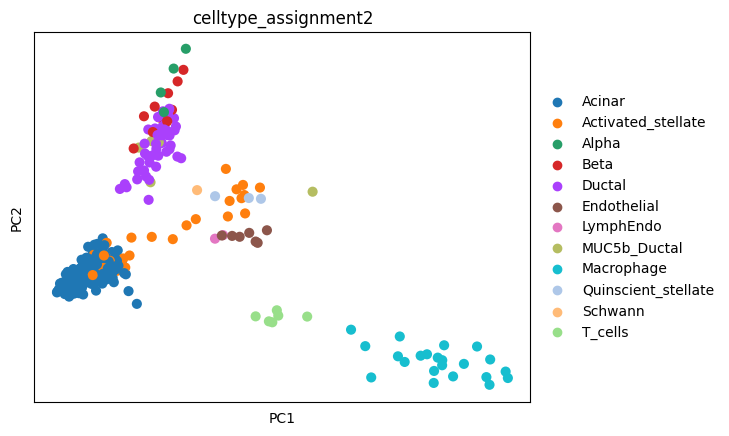

In [29]:
sc.tl.pca(adata)
sc.pl.pca(adata, color = "celltype_assignment2")

In [30]:
adata.write("adata.h5ad")

In [37]:
#run on tscc
#module load bedtools2
/tscc/nfs/home/abhowell/create_cisTarget_databases/create_fasta_with_padded_bg_from_bed.sh /tscc/nfs/home/abhowell/cistarget_genomes/hg38.fa /tscc/nfs/home/abhowell/cistarget_genomes/hg38.chrom.sizes /tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/outs/consensus_peak_calling/consensus_regions.bed MM_660.with_1kb_bg_padding.fa 1000 yes

/tscc/nfs/home/abhowell/create_cisTarget_databases/create_fasta_with_padded_bg_from_bed.sh: line 55: bedtools: command not found
/tscc/nfs/home/abhowell/create_cisTarget_databases/create_fasta_with_padded_bg_from_bed.sh: line 91: bedtools: command not found
paste: write error: Broken pipe
paste: write error


In [ ]:
#ls aertslab_motif_colleciton/v10nr_clust_public/singletons > motifs.txt
#mv motifs.txt cistarget_genomes/
#conda install -c conda-forge python-flatbuffers
#have to modify line 301 to cluster_buster_path
/tscc/nfs/home/abhowell/create_cisTarget_databases/create_cistarget_motif_databases.py -f /tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/MM_660.with_1kb_bg_padding.fa -M /tscc/nfs/home/abhowell/aertslab_motif_colleciton/v10nr_clust_public/singletons -m /tscc/nfs/home/abhowell/cistarget_genomes/motifs.txt -o /tscc/projects/ps-gaultonlab/abhowell/scenic_data_npod1/MM_660 --bgpadding 1000 -t 20

In [ ]:
##indexing error - you have to delete the Alpha and Lymph BED files that are empty or it will throw an error every time 